In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# For web scraping
import requests
from bs4 import BeautifulSoup

In [36]:
# Load CSV
df = pd.read_csv("/kaggle/input/survey-results-public/survey_results_public.csv")
df.head()


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [38]:
# --- Basic Info ---
print("Dataset shape:", df.shape)
print(df.info())


Dataset shape: (49123, 170)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Columns: 170 entries, ResponseId to JobSat
dtypes: float64(50), int64(1), object(119)
memory usage: 63.7+ MB
None


In [40]:
# --- Selecting relevant columns for analysis ---
cols_of_interest = [
    'MainBranch',      # Developer role
    'Age',
    'EdLevel',         # Education
    'Employment',
    'WorkExp',         # Experience
    'LearnCode',       # Languages learned
    'ConvertedCompYearly',  # Salary
    'JobSat'           # Job satisfaction
]
df_subset = df[cols_of_interest].copy()

# Drop rows with missing salary or role
df_subset = df_subset.dropna(subset=['MainBranch', 'ConvertedCompYearly'])

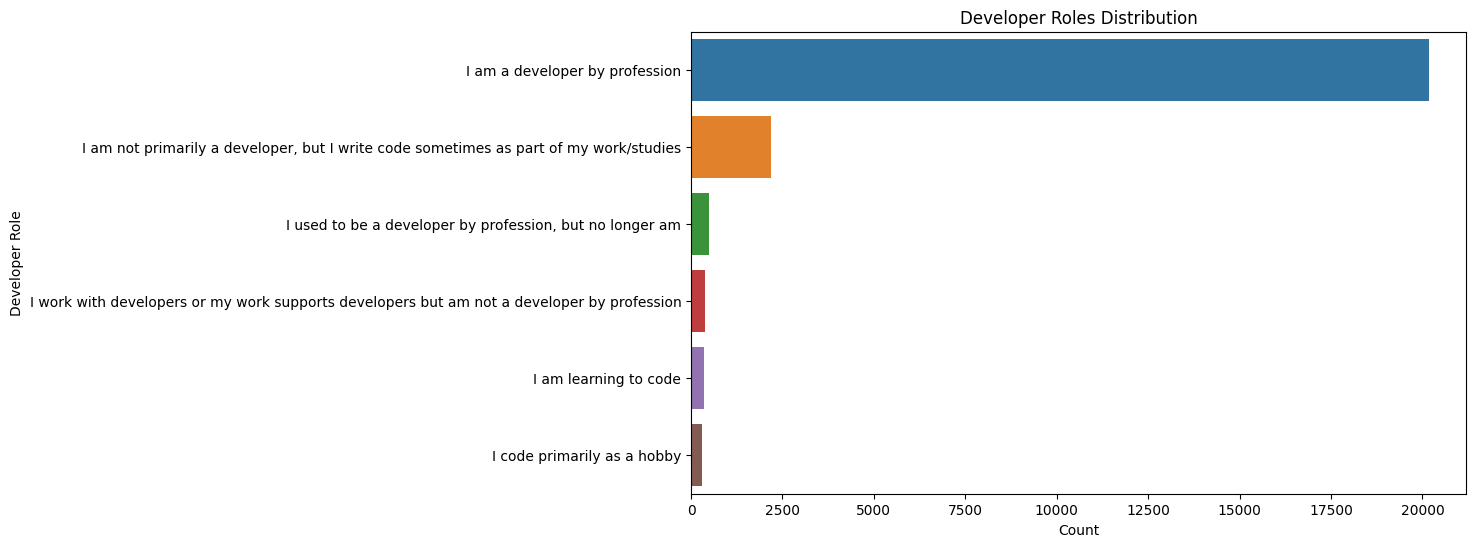

In [41]:
# --- EDA and Visualizations ---

# 1 Developer Roles Distribution
plt.figure(figsize=(10,6))
sns.countplot(y='MainBranch', data=df_subset, order=df_subset['MainBranch'].value_counts().index)
plt.title("Developer Roles Distribution")
plt.xlabel("Count")
plt.ylabel("Developer Role")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


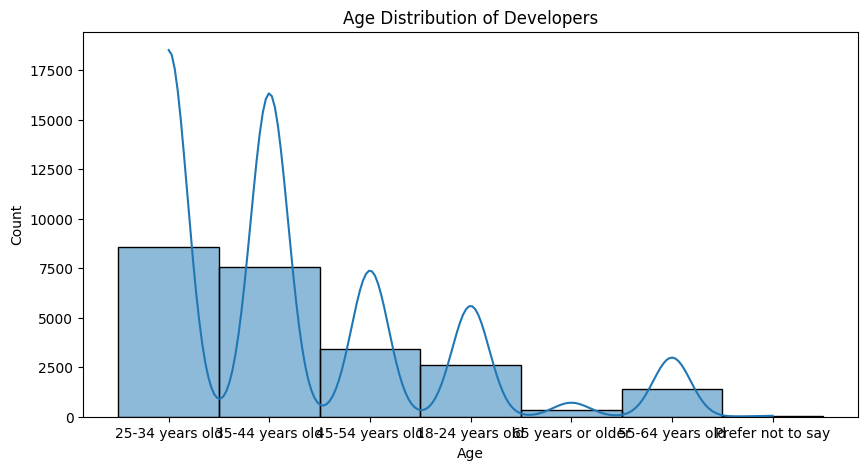

In [42]:
# 2 Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df_subset['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Developers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

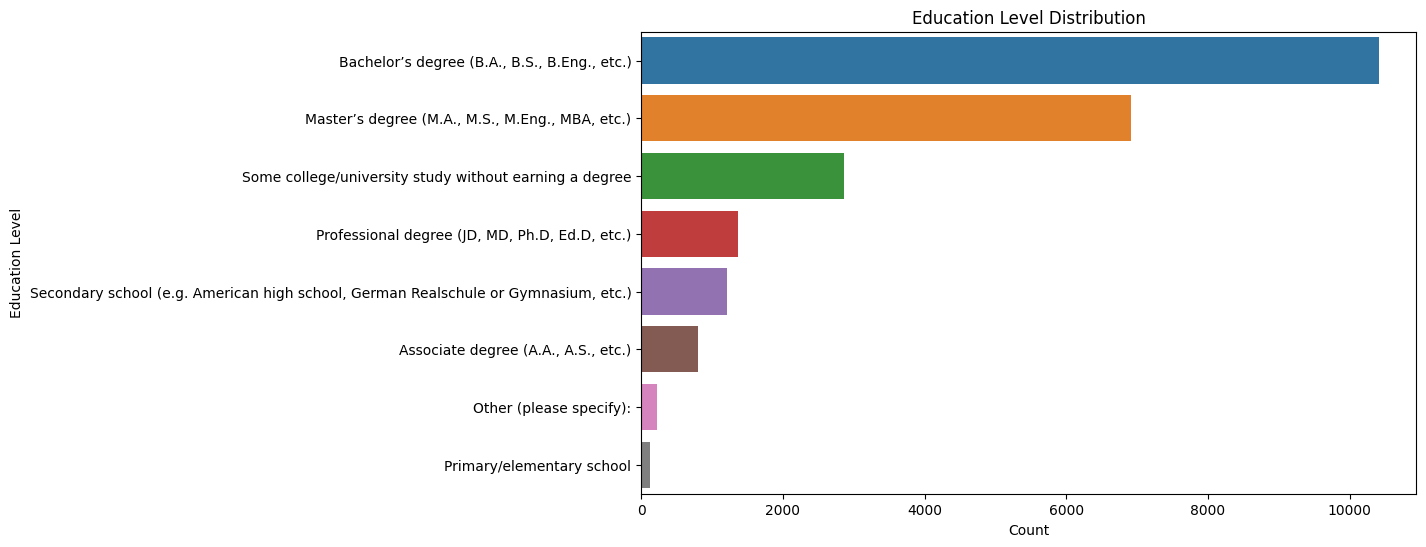

In [43]:
# 3 Education Level Distribution
plt.figure(figsize=(10,6))
sns.countplot(y='EdLevel', data=df_subset, order=df_subset['EdLevel'].value_counts().index)
plt.title("Education Level Distribution")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()

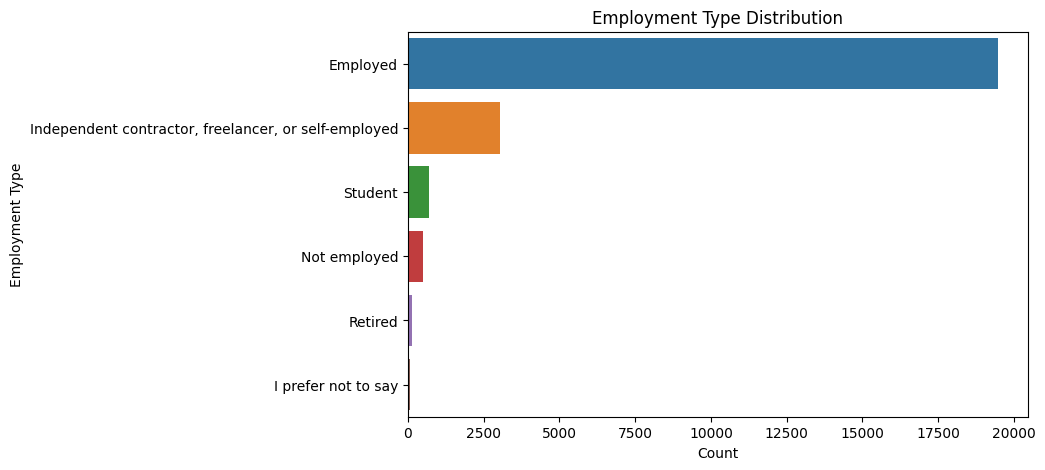

In [45]:
# 4 Employment Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(y='Employment', data=df_subset, order=df_subset['Employment'].value_counts().index)
plt.title("Employment Type Distribution")
plt.xlabel("Count")
plt.ylabel("Employment Type")
plt.show()

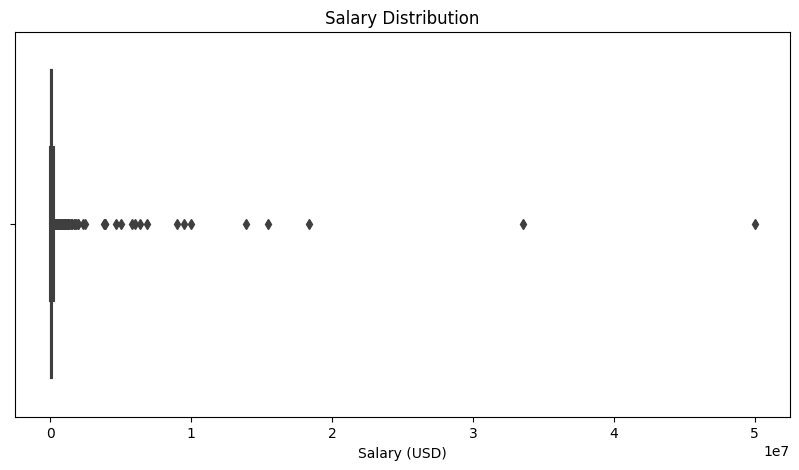

In [46]:
# 5 Salary Analysis (ConvertedCompYearly)
plt.figure(figsize=(10,5))
sns.boxplot(x='ConvertedCompYearly', data=df_subset)
plt.title("Salary Distribution")
plt.xlabel("Salary (USD)")
plt.show()

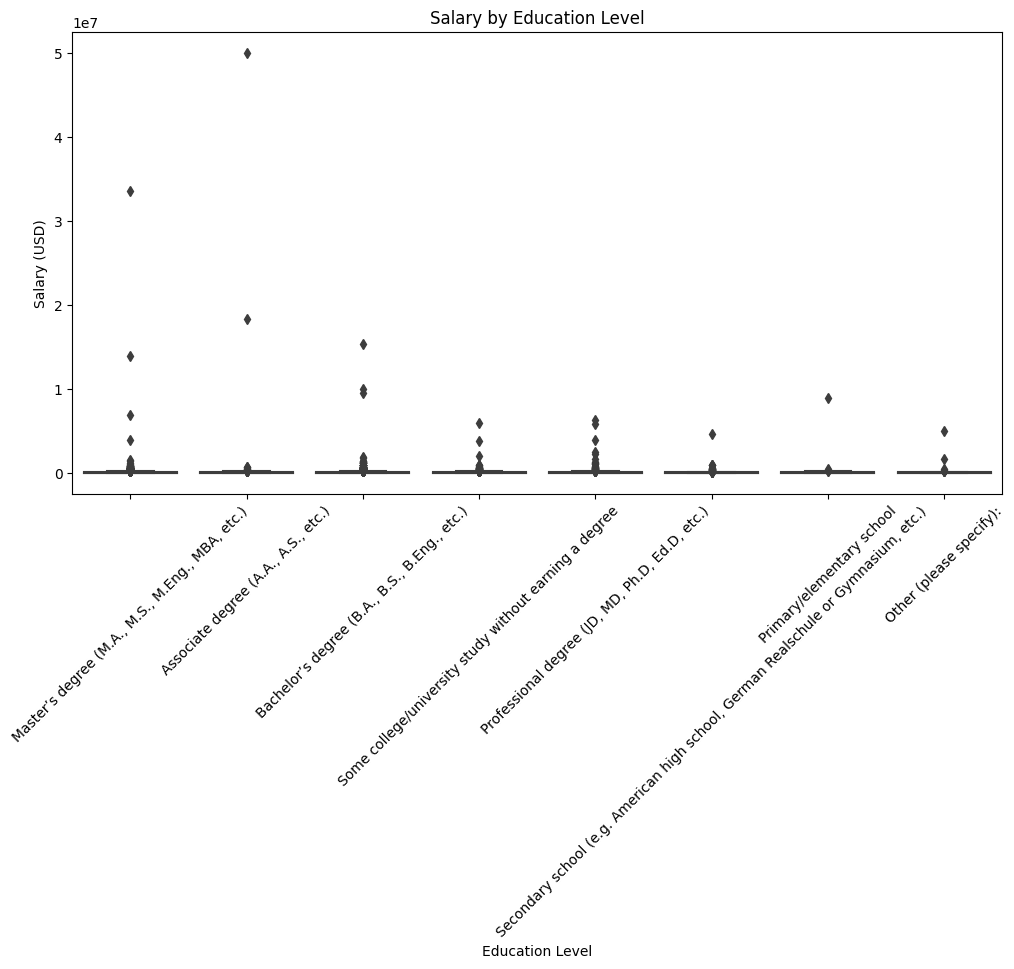

In [47]:
# Salary by Education Level
plt.figure(figsize=(12,6))
sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=df_subset)
plt.xticks(rotation=45)
plt.title("Salary by Education Level")
plt.ylabel("Salary (USD)")
plt.xlabel("Education Level")
plt.show()

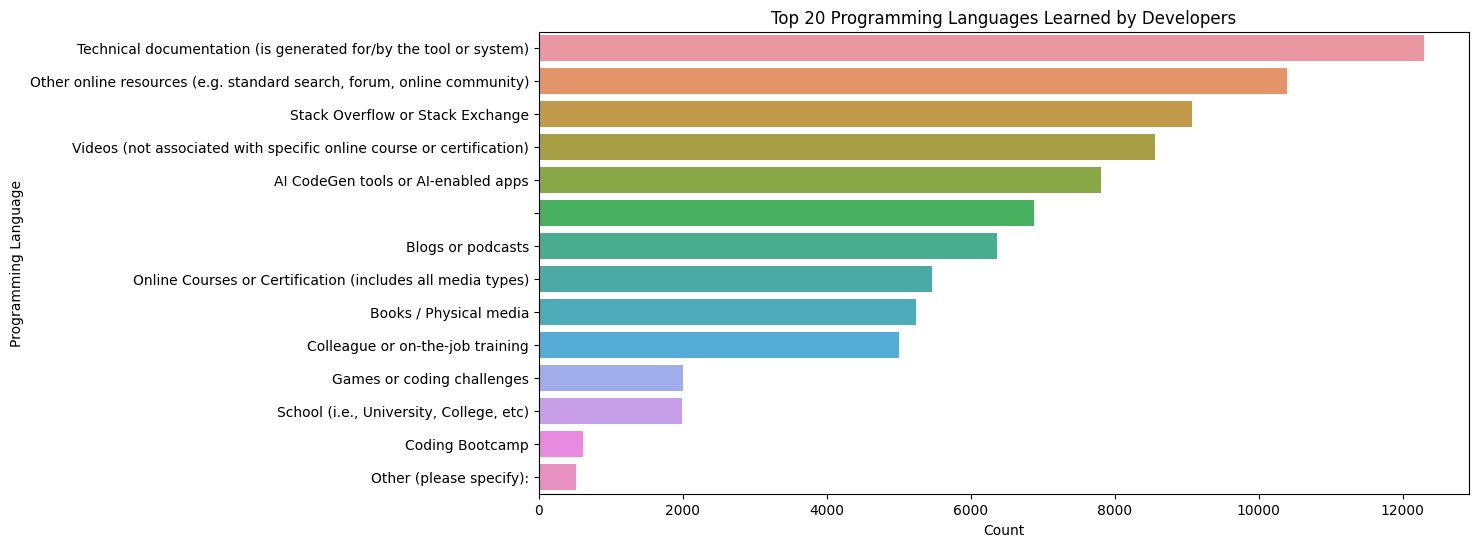

In [48]:
# 6 Programming Languages Learned
# Split multiple languages separated by semicolon
df_subset['LearnCode'] = df_subset['LearnCode'].fillna('')
all_languages = df_subset['LearnCode'].str.split(';').explode()
plt.figure(figsize=(12,6))
sns.countplot(y=all_languages, order=all_languages.value_counts().index[:20])
plt.title("Top 20 Programming Languages Learned by Developers")
plt.xlabel("Count")
plt.ylabel("Programming Language")
plt.show()

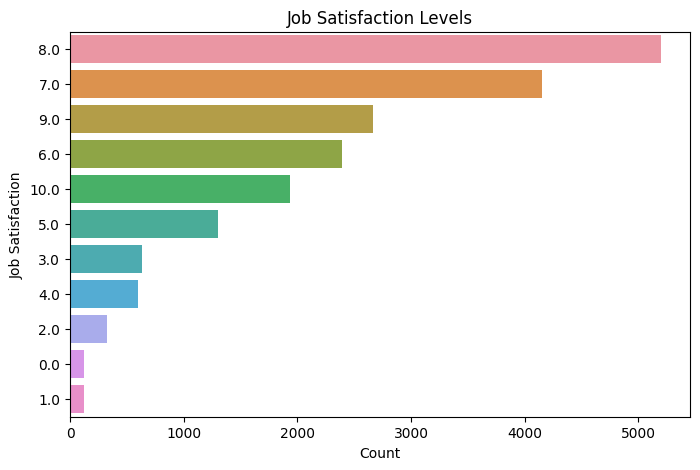

In [49]:
# 7 Job Satisfaction Analysis
plt.figure(figsize=(8,5))
sns.countplot(y='JobSat', data=df_subset, order=df_subset['JobSat'].value_counts().index)
plt.title("Job Satisfaction Levels")
plt.xlabel("Count")
plt.ylabel("Job Satisfaction")
plt.show()

In [50]:
# --- Insights ---
# Average salary by role
avg_salary_by_role = df_subset.groupby('MainBranch')['ConvertedCompYearly'].mean().sort_values(ascending=False)
print("Average Salary by Developer Role:")
print(avg_salary_by_role)

# Average salary by experience
avg_salary_by_exp = df_subset.groupby('WorkExp')['ConvertedCompYearly'].mean().sort_values(ascending=False)
print("Average Salary by Work Experience:")
print(avg_salary_by_exp)

Average Salary by Developer Role:
MainBranch
I code primarily as a hobby                                                                   310463.150160
I work with developers or my work supports developers but am not a developer by profession    124372.185567
I used to be a developer by profession, but no longer am                                      120490.357430
I am a developer by profession                                                                100995.037455
I am not primarily a developer, but I write code sometimes as part of my work/studies          83131.573981
I am learning to code                                                                          28380.828729
Name: ConvertedCompYearly, dtype: float64
Average Salary by Work Experience:
WorkExp
52.0    605889.333333
99.0    294752.000000
57.0    260000.000000
61.0    160000.000000
48.0    158496.000000
            ...      
1.0      47411.235706
2.0      46182.788355
68.0     36847.000000
65.0     13000.000000
75

In [51]:
# --- Save cleaned dataset ---
df_subset.to_csv('stack_overflow_cleaned.csv', index=False)